1. **Experimental Setup and Design**<br>
The goal is to determine if the difference in AOV between the two groups is statistically significant, meaning it is unlikely to have occurred by random chance.

A. Define the Variables
- Metric (Dependent Variable): Average Order Value (AOV), calculated as Total Revenue / Total Number of Orders for each group.
- Treatments (Independent Variable):
    - Group A: Receives the new marketing Strategy A.
    - Group B: Receives the new marketing Strategy B.
    - (Optional but Recommended: Control Group C): Receives the existing/original marketing strategy to serve as a baseline.
- Null Hypothesis ($H_0$): There is no statistically significant difference in AOV between Strategy A and Strategy B
($\text{AOV}_A = \text{AOV}_B$).
- Alternative Hypothesis ($H_a$): There is a statistically significant difference in AOV between Strategy A and Strategy B ($\text{AOV}_A \neq \text{AOV}_B$).

B. Sample Size Determination <br>

Before running the test, you must calculate the required sample size ($N$) to detect a meaningful change.
1. Define Minimum Detectable Effect (MDE): What is the smallest percentage lift in AOV you want to be able to reliably measure (e.g., 5%)
2. Set Significance Level ($\alpha$): Typically set at 0.05 (5%), meaning you are willing to accept a 5% chance of a False Positive (concluding a difference exists when it doesn't).
3. Set Statistical Power ($1-\beta$): Typically set at 0.80 (80%), meaning you want an 80% chance of detecting the MDE if it actually exists.

The required duration of the experiment is determined by the time needed to collect the required number of orders ($N$) for each group.

2. **Data Collection and Statistical Test**
<br>**A. Run the Experiment**
- Random Assignment: Randomly assign users to see either Strategy A or Strategy B. This is crucial to ensure the groups are comparable.
- Duration: Run the test until the required sample size ($N$) is reached. Do not peek at the results early, as this can inflate the Type I error rate.

**B. Select the Statistical Test (The T-Test)** <br>

Since AOV is a continuous variable, the most appropriate statistical test is the Two-Sample Student's t-Test (specifically, for independent samples). <br>

Note on AOV Distributions: AOV data is often heavily skewed (a few large orders inflate the average). If the distributions are highly non-normal, you may need to use a non-parametric test like the Mann-Whitney U test or collect a very large sample to rely on the Central Limit Theorem. <br>

**C. Calculate Key Metrics** <br>

| **Metric** | **Group A (Control)** | **Group B (Variant)** | **Formula / Description** |
|:------------|:----------------------:|:----------------------:|:---------------------------|
| **Total Orders (n)** | $n_A$ | $n_B$ | Number of orders (sample size per group) |
| **Total Revenue (R)** | $R_A$ | $R_B$ | Sum of order values per group |
| **Average Order Value (AOV, ($\bar{x}$))** | $$\bar{x}_A = \frac{R_A}{n_A}$$ | $$\bar{x}_B = \frac{R_B}{n_B}$$ | Mean order value per group |
| **Standard Deviation (s)** | $s_A$ | $s_B$ | Variability of order values within each group |


3. **Analysis and Interpretation**

**A. Calculate the T-Statistic (Example Formula)**

$$t = \frac{\bar{x}_A - \bar{x}_B}{\sqrt{\frac{s_A^2}{n_A} + \frac{s_B^2}{n_B}}}$$

**B. Determine the P-Value**<br>
Using the calculated $t$ statistic and the degrees of freedom (based on $n_A$ and $n_B$), statistical software will output a **$\rho$-value**.

**C. Decision Rule**<br>
Compare the $\rho$-value to your significance level ($\alpha = 0.05$):
- **If $\rho$-value $\leq 0.05$: Reject $H_0$**. The difference in AOV between Strategy A and Strategy B is statistically significant. The strategy with the higher AOV is the winner.
- **If $\rho$-value $> 0.05$: Fail to Reject $H_0$**. There is not enough evidence to conclude that one strategy is definitively better than the other based on AOV. You would conclude that the strategies perform similarly in terms of AOV (though you might still pick one based on cost or other secondary metrics).

In [1]:
import numpy as np
import pandas as pd
from scipy import stats

# 1. Simulate the Data
# In a real-world scenario, you would load this data from your database (e.g., SQL/CSV)
# AOV data is often skewed, so we simulate a skewed distribution (Gamma or Exponential)

# --- Simulation Parameters ---
# The true mean AOV for A is slightly higher than B
ORDERS_A = 1500
ORDERS_B = 1550
TRUE_MEAN_A = 105.00  # Strategy A: Average $105
TRUE_MEAN_B = 100.00  # Strategy B: Average $100
STD_DEV = 75.00      # High standard deviation (AOV is volatile)

# Generate data: We use a Log-Normal distribution to simulate positive, skewed order values.
# The 'loc' parameter shifts the distribution to ensure values are positive and meaningful.
np.random.seed(42) # for reproducibility

# Group A (Higher AOV)
data_a = np.random.lognormal(mean=np.log(TRUE_MEAN_A), sigma=np.log(1.5), size=ORDERS_A)
# Group B (Lower AOV)
data_b = np.random.lognormal(mean=np.log(TRUE_MEAN_B), sigma=np.log(1.5), size=ORDERS_B)

# --- 2. Calculate Key Metrics ---
aov_a = np.mean(data_a)
std_a = np.std(data_a, ddof=1) # ddof=1 for sample standard deviation
n_a = len(data_a)

aov_b = np.mean(data_b)
std_b = np.std(data_b, ddof=1)
n_b = len(data_b)

print("--- Data Summary ---")
print(f"Group A: Orders={n_a}, Mean AOV=${aov_a:.2f}, Std Dev=${std_a:.2f}")
print(f"Group B: Orders={n_b}, Mean AOV=${aov_b:.2f}, Std Dev=${std_b:.2f}")
print(f"Observed Lift (A vs B): {((aov_a - aov_b) / aov_b) * 100:.2f}%")
print("-" * 20)

# --- 3. Perform the Statistical Test (Two-Sample T-Test) ---

# We use the t-test from scipy.stats.
# equal_var=False performs Welch's t-test, which is generally safer 
# when the population variances (standard deviations) are unequal, 
# common in A/B testing.
t_stat, p_value = stats.ttest_ind(data_a, data_b, equal_var=False)

# --- 4. Interpretation ---
alpha = 0.05 # Significance level

print("--- T-Test Results ---")
print(f"T-Statistic: {t_stat:.4f}")
print(f"P-Value: {p_value:.4f}")
print("-" * 20)

print("--- Decision ---")
if p_value <= alpha:
    winner = "A" if aov_a > aov_b else "B"
    print(f"Result: Reject Null Hypothesis (H_0).")
    print(f"Conclusion: The difference is statistically significant.")
    print(f"Recommendation: Implement Strategy {winner} as it generates a higher AOV.")
else:
    print(f"Result: Fail to Reject Null Hypothesis (H_0).")
    print("Conclusion: The difference in AOV is not statistically significant at the 5% level.")
    print("Recommendation: Consider the strategies to be equally effective in terms of AOV.")

--- Data Summary ---
Group A: Orders=1500, Mean AOV=$116.17, Std Dev=$49.22
Group B: Orders=1550, Mean AOV=$108.66, Std Dev=$45.82
Observed Lift (A vs B): 6.92%
--------------------
--- T-Test Results ---
T-Statistic: 4.3624
P-Value: 0.0000
--------------------
--- Decision ---
Result: Reject Null Hypothesis (H_0).
Conclusion: The difference is statistically significant.
Recommendation: Implement Strategy A as it generates a higher AOV.


| **Element** | **Description** |
|:-------------|:----------------|
| **`stats.ttest_ind(data_A, data_B, equal_var=False)`** | Core function performing the two-sample *t*-test. It computes the *t*-statistic and two-tailed *p*-value to test for a difference in group means. |
| **`equal_var=False`** | Runs **Welch’s t-test**, which does **not assume equal variances** between groups. This makes it more robust for real-world A/B test data where variability often differs between A and B. |
| **P-Value** | The probability of observing a difference at least as extreme as the one measured, **assuming the Null Hypothesis ($H_0$) is true** — that is, there’s no actual difference between A and B. |
| **Decision Rule (($\rho \le 0.05$))** | If the *p*-value ≤ 0.05 (the significance level, \(\alpha\)), you **reject the Null Hypothesis** and conclude the difference in Average Order Value (AOV) is statistically significant. |


1. **Validity Check: Testing Secondary Metrics**
| **Secondary Metric** | **Why It's Important** | **Statistical Test** |
|:----------------------|:-----------------------|:----------------------|
| **Conversion Rate (CR)** | Checks whether the new strategy increases AOV by potentially **scaring away smaller buyers**, thus lowering the percentage of visitors who purchase. A lower CR with higher AOV might actually **reduce total revenue**. | **Two-Proportion Z-Test** — compares the proportions of conversions (binary outcomes: converted vs. not converted) between groups. |
| **Orders Per User (Frequency)** | Evaluates whether the strategy changes **how often customers make purchases**. A strategy that increases one-time AOV but decreases repeat orders can **hurt long-term revenue**. | **Mann–Whitney U Test** — a **non-parametric test** appropriate when order frequency is not normally distributed. |
| **Revenue Per Visitor (RPV)** | The **ultimate performance metric** combining conversion rate and AOV: $\text{RPV} = \text{CR} \times \text{AOV}$). It measures overall business impact and should guide final A/B test decisions. | **Two-Sample T-Test** — performed on per-user RPV values between groups. |


| **Secondary Metric** | **Why It's Important** | **Statistical Test** | **Python Function / Implementation** |
|:----------------------|:-----------------------|:----------------------|:--------------------------------------|
| **Conversion Rate (CR)** | Checks whether the new strategy increases AOV by potentially **scaring away smaller buyers**, thus lowering the percentage of visitors who purchase. A lower CR with higher AOV might actually **reduce total revenue**. | **Two-Proportion Z-Test** — compares conversion proportions (converted vs. not converted) between groups. | `from statsmodels.stats.proportion import proportions_ztest` <br> `count = [conversions_A, conversions_B]`<br>`nobs = [visitors_A, visitors_B]`<br>`stat, pval = proportions_ztest(count, nobs)` |
| **Orders Per User (Frequency)** | Evaluates whether the strategy changes **how often customers make purchases**. A strategy that increases one-time AOV but decreases repeat orders can **hurt long-term revenue**. | **Mann–Whitney U Test** — non-parametric; ideal when order frequency is not normally distributed. | `from scipy.stats import mannwhitneyu` <br> `stat, pval = mannwhitneyu(freq_A, freq_B, alternative='two-sided')` |
| **Revenue Per Visitor (RPV)** | The **ultimate metric**, combining conversion and AOV: \( \text{RPV} = \text{CR} \times \text{AOV} \). It reflects **total revenue impact per visitor** and should drive final A/B test conclusions. | **Two-Sample T-Test** — compares mean RPV values per user between groups. | `from scipy.stats import ttest_ind` <br> `stat, pval = ttest_ind(rpv_A, rpv_B, equal_var=False)` |


In [2]:
import pandas as pd

# Sample Data Assumptions
data = pd.DataFrame({
    "user_id": range(1, 11),
    "group": ["A","A","A","A","B","B","B","B","B","A"],
    "orders": [1, 0, 2, 1, 1, 2, 1, 0, 3, 1],
    "revenue": [50, 0, 100, 75, 55, 120, 60, 0, 150, 80]
})

In [3]:
# Step 1: Compute Key Metrics per Group
summary = data.groupby("group").agg(
    visitors=("user_id", "count"),
    conversions=("orders", lambda x: (x > 0).sum()),
    total_orders=("orders", "sum"),
    total_revenue=("revenue", "sum"),
    mean_orders=("orders", "mean"),
    mean_revenue=("revenue", "mean")
).reset_index()

summary["conversion_rate"] = summary["conversions"] / summary["visitors"]
summary["aov"] = summary["total_revenue"] / summary["total_orders"]
summary["rpv"] = summary["conversion_rate"] * summary["aov"]

print(summary.to_string())


  group  visitors  conversions  total_orders  total_revenue  mean_orders  mean_revenue  conversion_rate   aov   rpv
0     A         5            4             5            305          1.0          61.0              0.8  61.0  48.8
1     B         5            4             7            385          1.4          77.0              0.8  55.0  44.0


### Step 2: Statistical Tests per Metric

U = 10.000, p = 0.6536
t = -0.509, p = 0.6270


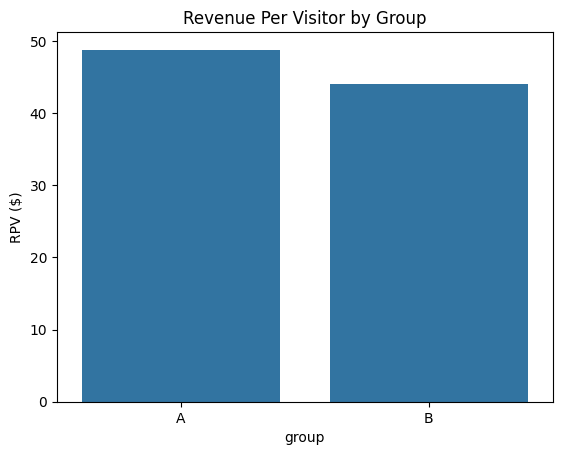

In [5]:
# Orders per User (Frequency) F = \text{avg orders per user} Mann–Whitney U Test
from scipy.stats import mannwhitneyu
freq_A = data[data.group=="A"]["orders"]
freq_B = data[data.group=="B"]["orders"]
stat, pval = mannwhitneyu(freq_A, freq_B, alternative="two-sided")
print(f"U = {stat:.3f}, p = {pval:.4f}")

# Revenue per Visitor (RPV)**  RPV = CR \ times AOV  Two-Sample t-Test
from scipy.stats import ttest_ind
rpv_A = data[data.group=="A"]["revenue"]
rpv_B = data[data.group=="B"]["revenue"]
stat, pval = ttest_ind(rpv_A, rpv_B, equal_var=False)
print(f"t = {stat:.3f}, p = {pval:.4f}")

## 📊 Optional: Visuals

import seaborn as sns
import matplotlib.pyplot as plt

sns.barplot(data=summary, x="group", y="rpv")
plt.title("Revenue Per Visitor by Group")
plt.ylabel("RPV ($)")
plt.show()


### Mann–Whitney U test
The Mann–Whitney U test (also called Wilcoxon rank-sum test) is a non-parametric test for comparing two independent samples. It tests whether one population tends to produce larger values than the other — i.e., whether the distributions differ in location/shift — without assuming normality. It's widely used in A/B testing when the metric is skewed, ordinal, or when sample sizes are small.

**U = 10.000, p = 0.6536**<br>

Interpretation:
- The p-value (0.65) is much greater than 0.05, meaning there’s no statistically significant difference in the number of orders per user between Strategy A and Strategy B.
- Users in both groups are ordering at roughly the same frequency.

✅ Conclusion:<br>
Neither marketing strategy affects how often customers purchase.

**t = -0.509, p = 0.6270**<br>
Two-Sample t-Test (Revenue per Visitor, RPV)
- Interpretation:
    - The p-value (0.63) is also > 0.05, meaning there’s no statistically significant difference in Revenue per Visitor between the two marketing strategies.
    - The small negative t-statistic suggests Group B’s mean RPV is slightly lower, but this difference is well within random noise.

✅ Conclusion: <br>
Strategy B did not meaningfully improve or harm total per-visitor revenue compared to Strategy A.

| **Metric**                | **Test Used**     | **Statistic** | **p-value** | **Significance (α=0.05)** | **Interpretation**           |
| :------------------------ | :---------------- | :-----------: | :---------: | :-----------------------: | :--------------------------- |
| Orders per User           | Mann–Whitney U    |     10.000    |    0.6536   |     ❌ Not Significant     | Purchase frequency unchanged |
| Revenue per Visitor (RPV) | Two-Sample t-Test |     -0.509    |    0.6270   |     ❌ Not Significant     | No measurable revenue lift   |

**Recommendation**
- The new marketing strategy does not show statistically significant improvement in customer behavior or per-visitor revenue.

Next steps:
- Consider refining messaging or audience targeting before scaling Strategy B.
- Continue testing with a larger sample if you suspect small effects (low Cohen’s d).
- Optionally, add secondary behavioral metrics (e.g., session duration, bounce rate) to see if subtle engagement effects exist.